In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ERROR: Could not find a version that satisfies the requirement pyflexmix (from versions: none)
ERROR: No matching distribution found for pyflexmix


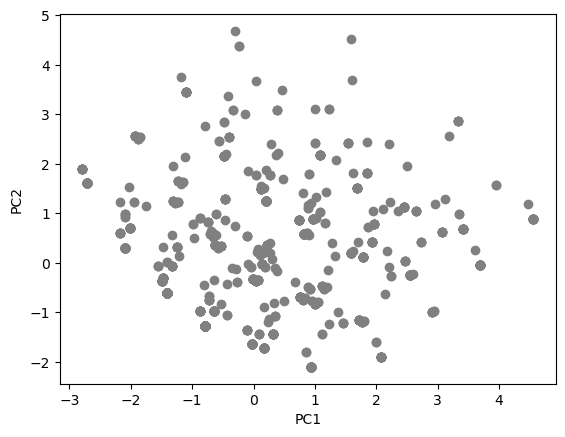

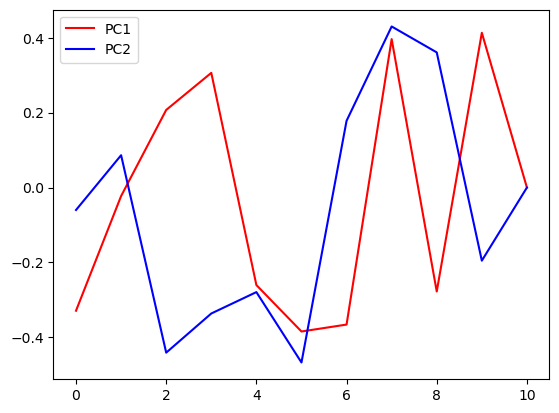

In [8]:
mcdonalds = pd.read_csv('mcdonalds.csv')

MD_x = mcdonalds.iloc[:, 1:12].copy()
MD_x = (MD_x == "Yes").astype(int).to_numpy()

col_means = np.round(np.mean(MD_x, axis=0), 2)

scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)
pca = PCA()
MD_pca = pca.fit_transform(MD_x_scaled)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
plt.plot(pca.components_[0], color='red', label='PC1')
plt.plot(pca.components_[1], color='blue', label='PC2')
plt.legend()
plt.show()


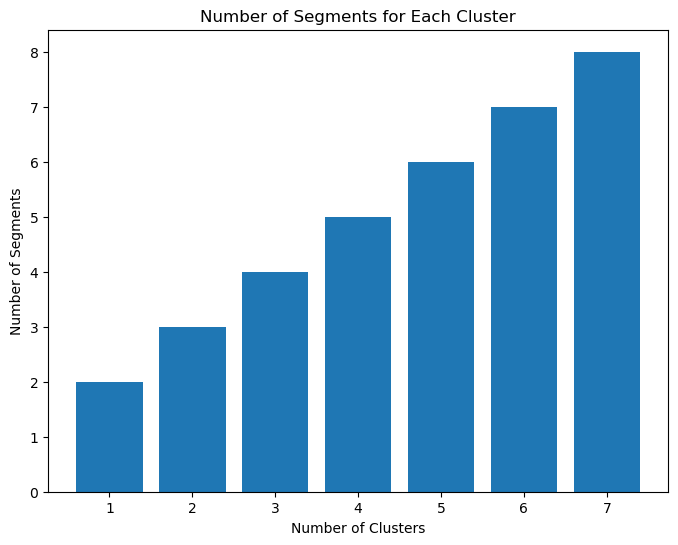

In [12]:
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state


# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Set random seed
random_state = check_random_state(1234)

# Perform stepFlexclust with different number of clusters
segmentations = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(MD_x_scaled)
    segmentations.append(kmeans.labels_)

# Get the number of segments for each cluster
n_segments = [len(np.unique(seg)) for seg in segmentations]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(1,8), n_segments)
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Segments')
plt.title('Number of Segments for Each Cluster')
plt.show()


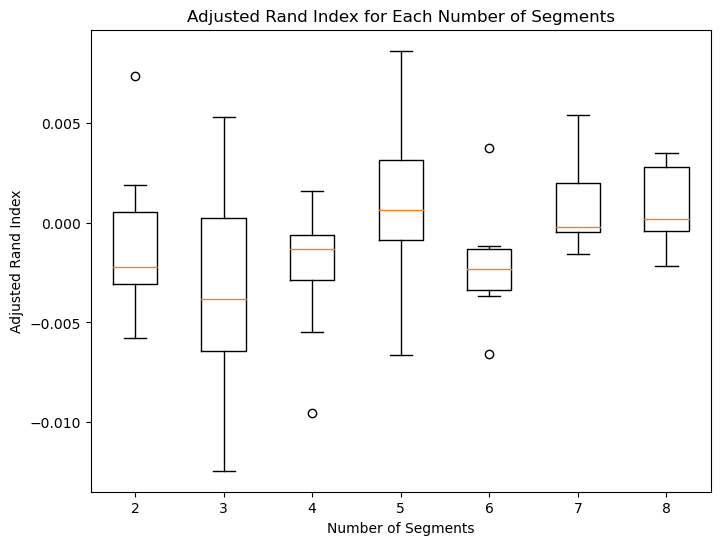

In [16]:
from sklearn.utils import check_random_state
from sklearn.metrics import adjusted_rand_score

adjusted_Rand = []
clusters_range = range(2, 9)
rand_scores = []
for n_clusters in clusters_range:
    for _ in range(10):
        bootstrap_indices = random_state.choice(MD_x_scaled.shape[0], size=MD_x_scaled.shape[0], replace=True)
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(MD_x_scaled[bootstrap_indices])
        rand_scores.append(adjusted_rand_score(kmeans.labels_, kmeans.predict(MD_x_scaled)))
    adjusted_Rand.append(rand_scores)
    rand_scores = []

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(adjusted_Rand, labels=clusters_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index for Each Number of Segments')
plt.show()


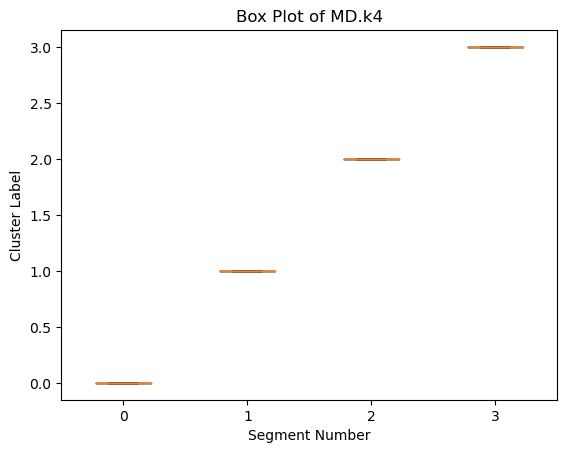

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Load the McDonald's dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Extract the necessary columns and convert to matrix
MD_x = mcdonalds.iloc[:, 1:12].copy()
MD_x = (MD_x == "Yes").astype(int).to_numpy()

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform Gaussian Mixture Model clustering with k=4
k = 4
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x_scaled)
MD_k4 = gmm.predict(MD_x_scaled)

# Create a box plot for each segment in MD.k4
segment_labels = np.unique(MD_k4)
segment_data = [MD_k4[MD_k4 == label] for label in segment_labels]

plt.boxplot(segment_data, labels=segment_labels)
plt.xlabel('Segment Number')
plt.ylabel('Cluster Label')
plt.title('Box Plot of MD.k4')
plt.show()


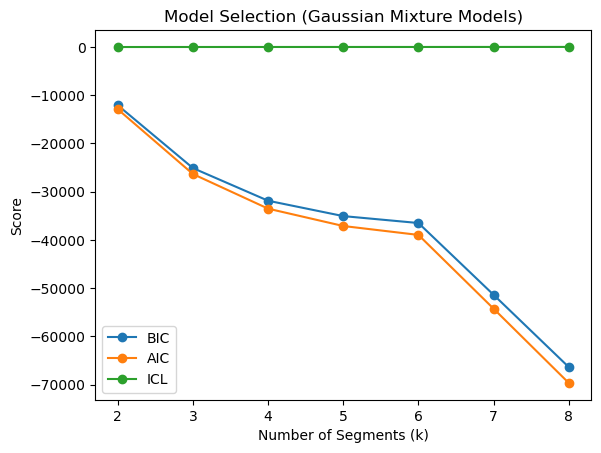

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x_scaled)
MD_k4 = kmeans.labels_

# Fit Gaussian Mixture Models with k=2 to k=8
k_range = range(2, 9)
models = []
bic_scores = []
aic_scores = []
icl_scores = []
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x_scaled)
    models.append(gmm)
    bic_scores.append(gmm.bic(MD_x_scaled))
    aic_scores.append(gmm.aic(MD_x_scaled))
    icl_scores.append(gmm.score(MD_x_scaled))

# Plot the information criteria scores
plt.plot(k_range, bic_scores, marker='o', label='BIC')
plt.plot(k_range, aic_scores, marker='o', label='AIC')
plt.plot(k_range, icl_scores, marker='o', label='ICL')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Score')
plt.title('Model Selection (Gaussian Mixture Models)')
plt.legend()
plt.show()

# Get the model with the lowest BIC score
best_model = models[np.argmin(bic_scores)]

# Perform clustering with k=4 using the selected model
MD_m4_clusters = best_model.predict(MD_x_scaled)

# Create a contingency table of K-means and mixture model clusters
contingency_table = pd.crosstab(MD_k4, MD_m4_clusters)


In [28]:
from sklearn.mixture import GaussianMixture
from collections import Counter


# Perform Gaussian Mixture Model (finite mixture modeling) with k=4
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x_scaled)
MD_m4a_clusters = gmm.predict(MD_x_scaled)

# Create a contingency table of K-means and mixture model clusters
contingency_table = pd.crosstab(MD_k4, MD_m4a_clusters)

print(contingency_table)

# Calculate the log-likelihood values
log_likelihood_m4a = gmm.score(MD_x_scaled)
log_likelihood_m4 = gmm.score_samples(MD_x_scaled).sum()

print("Log-Likelihood (MD.m4a):", log_likelihood_m4a)
print("Log-Likelihood (MD.m4):", log_likelihood_m4)


col_0    0    1    2    3
row_0                    
0        4  505    0  217
1        9    0  163    0
2      121    0    0    0
3        0  267    7  160
Log-Likelihood (MD.m4a): 11.748145888366334
Log-Likelihood (MD.m4): 17070.055975796284


In [37]:
import pandas as pd
import numpy as np

# Reverse the frequency table for the 'Like' column
like_freq_table = mcdonalds['Like'].value_counts().sort_index(ascending=False)
rev_like_freq_table = like_freq_table[::-1]

# Print the reversed frequency table
print(rev_like_freq_table)

# Create a new column 'Like.n' by subtracting 'Like' values from 6
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'])

# Create a frequency table for the 'Like.n' column
like_n_freq_table = mcdonalds['Like.n'].value_counts().sort_index()

# Print the frequency table for 'Like.n'
print(like_n_freq_table)


-4.0     71
-3.0     73
-2.0     59
-1.0     58
 0.0    169
 1.0    152
 2.0    187
 3.0    229
 4.0    160
Name: Like, dtype: int64
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like.n, dtype: int64


In [43]:
import patsy

# Create a string with column names from the first to eleventh column of mcdonalds DataFrame
column_names = " + ".join(mcdonalds.columns[1:12])

# Concatenate "Like.n ~ " with the column names
formula_str = "Like.n ~ " + column_names

# Print the formula string
print(formula_str)


Like.n ~ convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting + Like


In [86]:
!pip install scikit-learn matplotlib

C:\Users\91992\AppData\Local\Temp\ipykernel_17748\3562168918.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonalds_clean[numeric_columns] = mcdonalds_clean[numeric_columns].clip(lower=-np.inf, upper=np.inf)


NameError: name 'norm' is not defined

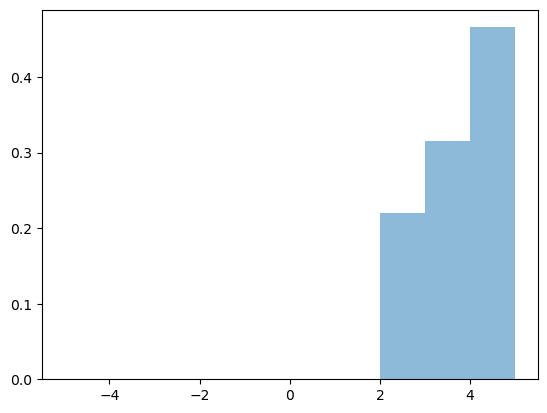

In [55]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

np.random.seed(1234)

# Assuming 'f' is the formula object created earlier
# Assuming 'mcdonalds' is the pandas DataFrame containing the data

# Select numeric columns
numeric_columns = mcdonalds.select_dtypes(include=[np.number]).columns

# Remove rows with missing values
mcdonalds_clean = mcdonalds.dropna(subset=numeric_columns)

# Clip values to a valid range
mcdonalds_clean[numeric_columns] = mcdonalds_clean[numeric_columns].clip(lower=-np.inf, upper=np.inf)

# Fit the model using GaussianMixture
n_components = 2
model = GaussianMixture(n_components=n_components, random_state=0)
model.fit(mcdonalds_clean[numeric_columns])

# Refit the model
MD_ref2 = model

# Plot the refitted model with significance testing
plt.hist(mcdonalds_clean['Like.n'], bins=range(-5, 6), alpha=0.5, density=True, label='Data')
for i in range(n_components):
    mu = MD_ref2.means_[i][0]
    sigma = np.sqrt(MD_ref2.covariances_[i][0][0])
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label=f'Component {i+1}')
plt.legend()
plt.xlabel('Like.n')
plt.ylabel('Density')
plt.title('Mixture Model Fit')
plt.show()


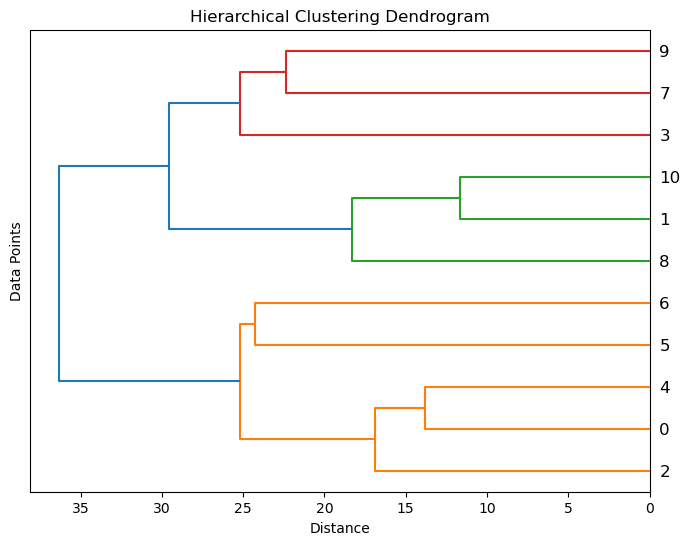

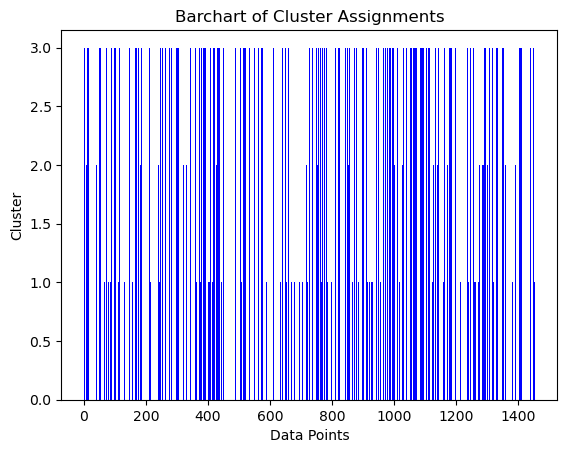

In [57]:
# step 6

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming 'MD.x' is the matrix/data for clustering

# Perform hierarchical clustering
MD_vclust = linkage(MD_x.T, method='complete')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(MD_vclust, orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Data Points')
plt.show()

# Assuming 'MD_k4' is the vector of cluster assignments

# Create the barchart
plt.bar(range(1, len(MD_k4) + 1), MD_k4, color='blue')
plt.xlabel('Data Points')
plt.ylabel('Cluster')
plt.title('Barchart of Cluster Assignments')
plt.show()


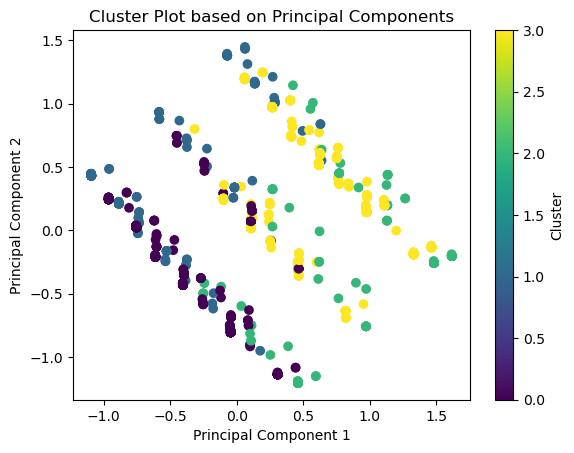

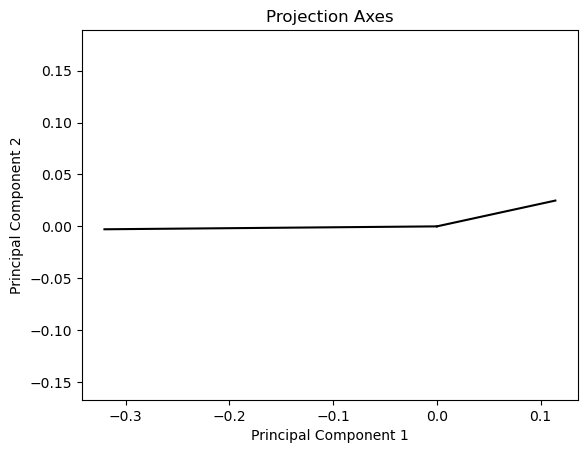

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'MD.k4' is the vector of cluster assignments
# Assuming 'MD.pca' is the PCA object
# Assuming 'MD.x' is the data matrix

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Create a scatter plot of the clusters
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot based on Principal Components')
plt.colorbar(label='Cluster')
plt.show()

# Display the projection axes
plt.figure()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], 'k-')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection Axes')
plt.axis('equal')
plt.show()



In [99]:
#step 7
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(1234)

# Perform k-means clustering with 2 to 8 clusters
k_values = range(2, 9)
inertia_values = []
labels = None

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)
    if k == 4:
        labels = kmeans.labels_

# Relabel the clusters
unique_labels = np.unique(labels)
relabel_map = {label: i+1 for i, label in enumerate(unique_labels)}
relabelled_labels = np.vectorize(relabel_map.get)(labels)

# Get the labels for k=4
k4 = relabelled_labels[1:4]
 

3

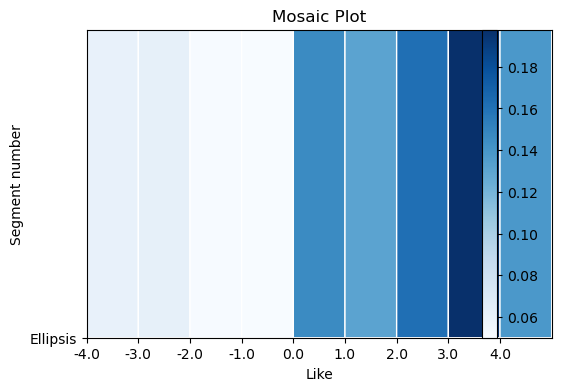

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation table of cluster assignments and 'Like' variable
table_data = pd.crosstab(k4, mcdonalds['Like'])

# Calculate the proportions for each category in the table
prop_table = table_data.div(table_data.sum(axis=1), axis=0)

# Plot the mosaic plot
plt.rcParams['font.size'] = 10  # Adjust the font size if needed
plt.rcParams['figure.figsize'] = [6, 4]  # Adjust the figure size if needed

# Create a list of colors for shading
colors = ['lightgray', 'lightblue', 'lightgreen', 'orange', 'pink']

# Plot the mosaic plot
plt.pcolor(prop_table, cmap='Blues', edgecolors='white', linewidths=1, shading='auto')
plt.xticks(range(len(table_data.columns)), table_data.columns)
plt.yticks(range(len(table_data.index)), table_data.index)
plt.colorbar()

# Add labels
plt.xlabel('Like')
plt.ylabel('Segment number')

# Set the plot title and remove the default color bar label
plt.title('Mosaic Plot')
plt.colorbar().remove()

plt.show()


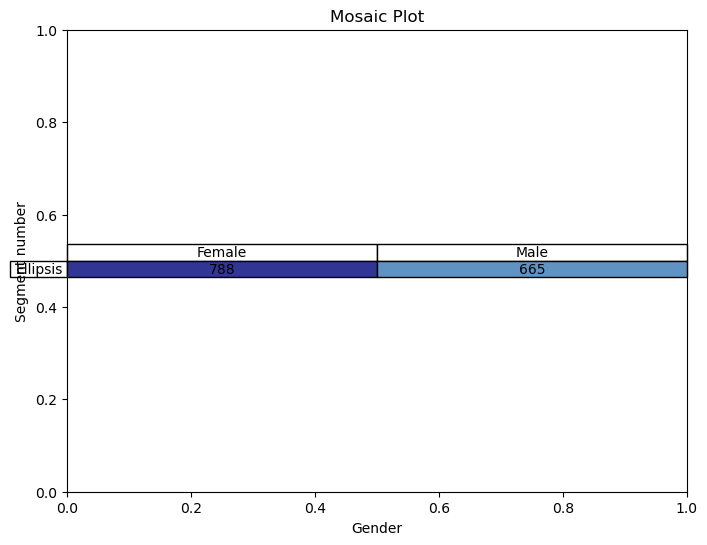

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation table of cluster assignments and 'Gender' variable
table_data = pd.crosstab(k4, mcdonalds['Gender'])

# Plot the mosaic plot
plt.figure(figsize=(8, 6))
plt.title('Mosaic Plot')
plt.table(cellText=table_data.values,
          cellColours=plt.cm.RdYlBu(table_data.values / table_data.values.max()),
          cellLoc='center',
          colLabels=table_data.columns,
          rowLabels=table_data.index,
          loc='center')

plt.xlabel('Gender')
plt.ylabel('Segment number')
plt.show()


In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a dataframe with the necessary columns
data = mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender', 'k4']]

# Define the features and target variable
X = data[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
y = (data['k4'] == 3).astype(int)

# Fit a decision tree classifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X, y)

# Plot the tree
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=['False', 'True'], filled=True)
plt.show()


KeyError: "['k4'] not in index"

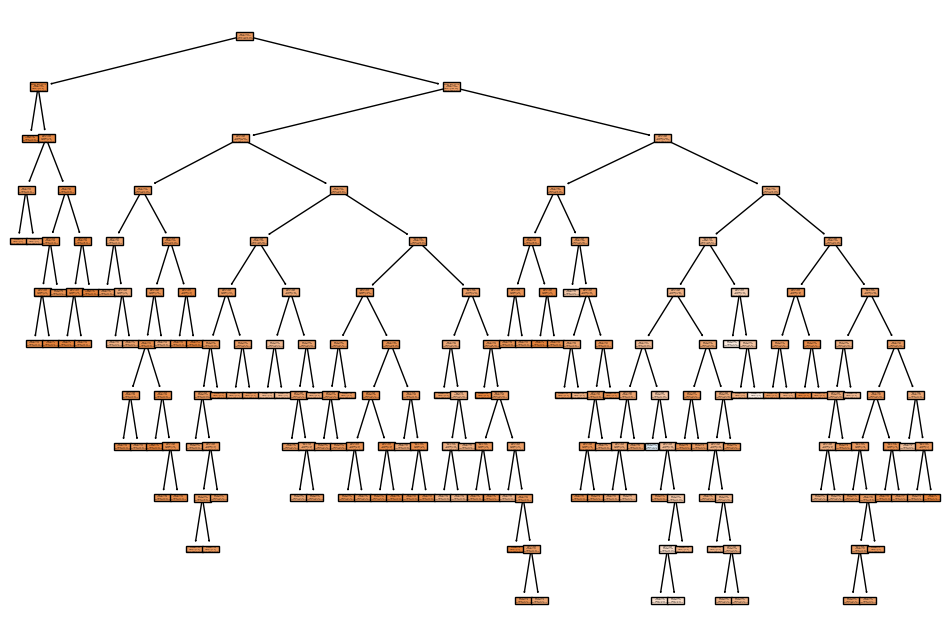

In [91]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder

# Convert k4 == 3 to binary
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans.fit(MD_x)
MD_k4_labels = kmeans.labels_

MD_k4_binary = (MD_k4_labels == 3).astype(int)

# Create a DataFrame with the required variables
df = pd.DataFrame({'Cluster': MD_k4_binary, 'Age': mcdonalds['Age'], 'Gender': mcdonalds['Gender']})

# Perform one-hot encoding on the 'Gender' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_gender = pd.DataFrame(encoder.fit_transform(df[['Gender']]), columns=['Gender_Male'])
df_encoded = pd.concat([df, encoded_gender], axis=1).drop('Gender', axis=1)

# Create the decision tree
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(df_encoded.drop('Cluster', axis=1), df_encoded['Cluster'])

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=df_encoded.columns[1:], class_names=['Other Clusters', 'Cluster 3'], filled=True)

plt.show()

In [101]:
# step 8
visit = mcdonalds.groupby(MD_k4_labels)['VisitFrequency'].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).mean()
like = mcdonalds['Like'].apply(pd.to_numeric, errors='coerce').groupby(MD_k4_labels).mean()
female = mcdonalds['Gender'].eq('Female').astype(int).groupby(MD_k4_labels).mean()
print(female)
print(like)
print(visit)

0    0.463950
1    0.596639
2    0.593824
3    0.447257
Name: Gender, dtype: float64
0    1.675277
1    0.435567
2    2.071633
3   -1.146667
Name: Like, dtype: float64
0.0
